In [1]:
%matplotlib inline
from matplotlib import style
style.use('fivethirtyeight')
import matplotlib.pyplot as plt

In [2]:
import numpy as np
import pandas as pd
import datetime as dt

# Reflect Tables into SQLAlchemy ORM

In [14]:
# Python SQL toolkit and Object Relational Mapper
import sqlalchemy
from sqlalchemy.ext.automap import automap_base
from sqlalchemy.orm import Session
from sqlalchemy import create_engine, func, inspect

In [15]:
# create engine to hawaii.sqlite
engine = create_engine("sqlite:///Resources/hawaii.sqlite")

In [16]:
# reflect an existing database into a new model
Base = automap_base()
# reflect the tables
Base.prepare(engine, reflect= True)


In [17]:
# View all of the classes that automap found
Base.classes.keys()

['measurement', 'station']

In [18]:
# Save references to each table
Measurement = Base.classes.measurement
Station = Base.classes.station

In [19]:
# Create our session (link) from Python to the DB
session = Session(engine)

# Exploratory Precipitation Analysis

In [20]:
# Find the most recent date in the data set.
# Inspector imported to identify columns
inspector = inspect(engine)
measurement_columns = inspector.get_columns("measurement")
for columns in measurement_columns:
    print(columns["name"], columns["type"])

id INTEGER
station TEXT
date TEXT
prcp FLOAT
tobs FLOAT


In [21]:
# Use again for columns in station table
station_columns = inspector.get_columns("station")
for columns in station_columns:
    print(columns["name"],columns["type"])

id INTEGER
station TEXT
name TEXT
latitude FLOAT
longitude FLOAT
elevation FLOAT


In [22]:
# Query to return most recent date by picking first data row after ordering date in desc order
newest_date = session.query(Measurement.date).\
    order_by(Measurement.date.desc()).first()

print(newest_date)

('2017-08-23',)


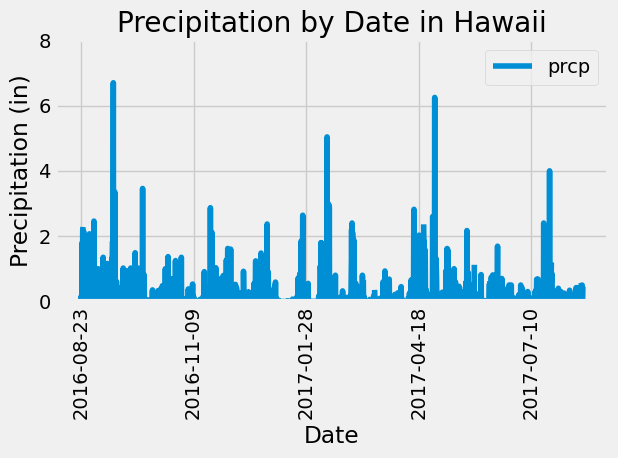

In [24]:
# Design a query to retrieve the last 12 months of precipitation data and plot the results. 
# Starting from the most recent data point in the database. 
# Calculate the date one year from the last date in data set.
# Perform a query to retrieve the data and precipitation scores

## See below, filtering at 2016-8-22 means that we encompass this requirement 
## In addition, dates and prcp values are saved in the variable values
values = session.query(Measurement.date, Measurement.prcp).\
    filter(Measurement.date > '2016-08-22').\
    order_by(Measurement.date).all()
## Alternatively can code for it 
# end_date=dt.datetime.strptime(newest_dte[0], '%Y-%m-%d')
# start_date = latest_date - dt.timedelta(days=365)
# print(start_date)
## Check code to see if values are correct
#for value in values:
#   print(values)


# Save the query results as a Pandas DataFrame and set the index to the date column
values_df = pd.DataFrame(values)
prcp_df = values_df.set_index("date")
prcp_df

# Use Pandas Plotting with Matplotlib to plot the data
prcp_df.plot(rot=45, title='Precipitation by Date in Hawaii')
plt.ylim(0,8)
plt.xticks(rotation=90)
plt.title
plt.xlabel('Date')
plt.ylabel('Precipitation (in)')
plt.tight_layout()
plt.show()



In [25]:
# Use Pandas to calcualte the summary statistics for the precipitation data
prcp_df.describe()


,prcp
count,2021.000000
mean,0.177279
std,0.461190
min,0.000000
25%,0.000000
50%,0.020000
75%,0.130000
max,6.700000


# Exploratory Station Analysis

In [26]:
# Design a query to calculate the total number stations in the dataset
total_stations=session.query(Station.station).count()
total_stations

9

In [27]:
# Design a query to find the most active stations (i.e. what stations have the most rows?)
# List the stations and the counts in descending order.
popular_stations = session.query(Measurement.station,func.count(Measurement.station)).\
    order_by(func.count(Measurement.station).desc()).\
    group_by(Measurement.station).all() 

print(popular_stations) 

[('USC00519281', 2772), ('USC00519397', 2724), ('USC00513117', 2709), ('USC00519523', 2669), ('USC00516128', 2612), ('USC00514830', 2202), ('USC00511918', 1979), ('USC00517948', 1372), ('USC00518838', 511)]


In [30]:
# Using the most active station id from the previous query, calculate the lowest, highest, and average temperature.
# Get most active station
most_active_station = session.query(Measurement.station,func.count(Measurement.station)).\
    order_by(func.count(Measurement.station).desc()).\
    group_by(Measurement.station).first()
print(most_active_station)
# Get just the station number
most_active_station_number = most_active_station[0]
most_active_station_number

# Lowest Temp
lowest_temp = session.query(func.min(Measurement.tobs)).\
  filter(Measurement.station==most_active_station_number).all()

print(lowest_temp) 

# Highest Temp
highest_temp = session.query(func.max(Measurement.tobs)).\
  filter(Measurement.station==most_active_station_number).all()

print(highest_temp)

# Average Temp
average_temp = session.query(func.avg(Measurement.tobs)).\
    filter(Measurement.station==most_active_station_number).all()

print(average_temp)


('USC00519281', 2772)
[(54.0,)]
[(85.0,)]
[(71.66378066378067,)]


In [31]:
## Check work
print(f'The lowest temperature for the station: {lowest_temp}')
print(f'The highest temperature for the station: {highest_temp}')
print(f'The average temperature for the station: {average_temp}')

The lowest temperature for the station: [(54.0,)]
The highest temperature for the station: [(85.0,)]
The average temperature for the station: [(71.66378066378067,)]


In [33]:
# Using the most active station id
# Query the last 12 months of temperature observation data for this station and plot the results as a histogram
recent_popular_station = session.query(Measurement.date,Measurement.tobs).\
    filter(Measurement.station == most_active_station_number).\
    order_by(Measurement.date.desc()).first()
print(recent_popular_station)

('2017-08-18', 79.0)


In [35]:
annual_16to17_values = session.query(Measurement.date,Measurement.tobs).\
    filter(Measurement.station == most_active_station_number).\
    filter(Measurement.date > '2016-08-17').all()
for value in annual_16to17_values:
    print(value)

('2016-08-18', 80.0)
('2016-08-19', 79.0)
('2016-08-20', 81.0)
('2016-08-21', 79.0)
('2016-08-22', 78.0)
('2016-08-23', 77.0)
('2016-08-24', 77.0)
('2016-08-25', 80.0)
('2016-08-26', 80.0)
('2016-08-27', 75.0)
('2016-08-28', 73.0)
('2016-08-29', 78.0)
('2016-08-30', 77.0)
('2016-08-31', 78.0)
('2016-09-01', 80.0)
('2016-09-02', 80.0)
('2016-09-03', 78.0)
('2016-09-04', 78.0)
('2016-09-05', 78.0)
('2016-09-06', 73.0)
('2016-09-07', 74.0)
('2016-09-08', 80.0)
('2016-09-09', 79.0)
('2016-09-10', 77.0)
('2016-09-11', 80.0)
('2016-09-12', 76.0)
('2016-09-13', 79.0)
('2016-09-14', 75.0)
('2016-09-15', 79.0)
('2016-09-16', 78.0)
('2016-09-17', 79.0)
('2016-09-18', 78.0)
('2016-09-19', 78.0)
('2016-09-20', 76.0)
('2016-09-21', 74.0)
('2016-09-22', 77.0)
('2016-09-23', 78.0)
('2016-09-24', 79.0)
('2016-09-25', 79.0)
('2016-09-26', 77.0)
('2016-09-27', 80.0)
('2016-09-28', 78.0)
('2016-09-29', 78.0)
('2016-09-30', 78.0)
('2016-10-01', 77.0)
('2016-10-02', 79.0)
('2016-10-03', 79.0)
('2016-10-04'

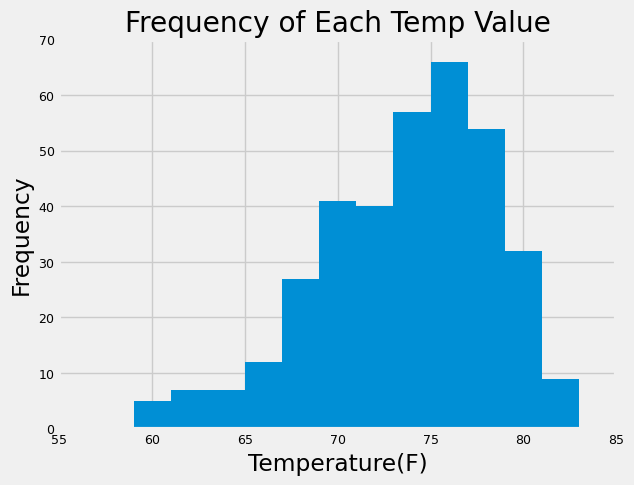

In [45]:
## Plot
annual_tobs_df=pd.DataFrame(annual_16to17_values)['tobs']
annual_tobs_df

annual_tobs_df.hist(bins=12)
plt.title('Frequency of Each Temp Value')
plt.ylabel('Frequency')
plt.xlabel('Temperature(F)')
plt.xticks(fontsize=9)
plt.xlim(55,85)
plt.yticks(fontsize=9)
plt.ylim(0,70)
plt.tight_layout
plt.show()

# Close session

In [ ]:
# Close Session
session.close()